In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
#import pandas.api.types as  ptypes

%matplotlib inline

In [27]:
# read weatherHistory.csv file
dataset = pd.read_csv("weatherHistory.csv")
dataset.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [28]:
dataset.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [29]:
# rename column Apparent Temperature
dataset.rename(columns={'Apparent Temperature (C)':'y','Humidity':'x'},inplace = True)

In [30]:
dataset.describe()

,Temperature (C),y,x,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [31]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
Formatted Date            96453 non-null object
Summary                   96453 non-null object
Precip Type               96453 non-null object
Temperature (C)           96453 non-null float64
y                         96453 non-null float64
x                         96453 non-null float64
Wind Speed (km/h)         96453 non-null float64
Wind Bearing (degrees)    96453 non-null float64
Visibility (km)           96453 non-null float64
Loud Cover                96453 non-null float64
Pressure (millibars)      96453 non-null float64
Daily Summary             96453 non-null object
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [32]:
# calculating  sum of null values
#dataset.isna().sum()
dataset.isnull().sum()


Formatted Date            0
Summary                   0
Precip Type               0
Temperature (C)           0
y                         0
x                         0
Wind Speed (km/h)         0
Wind Bearing (degrees)    0
Visibility (km)           0
Loud Cover                0
Pressure (millibars)      0
Daily Summary             0
dtype: int64

In [33]:
# getting column x and y in dataset
dataset = dataset.loc[:,['y','x']]
dataset.head()

,y,x
0,7.388889,0.89
1,7.227778,0.86
2,9.377778,0.89
3,5.944444,0.83
4,6.977778,0.83


In [34]:
# replacing missing values with mean

dataset['x'].replace(np.NaN,dataset['x'].mean(), inplace = True)
       
dataset['y'].replace(np.NaN,dataset['y'].mean(), inplace = True)

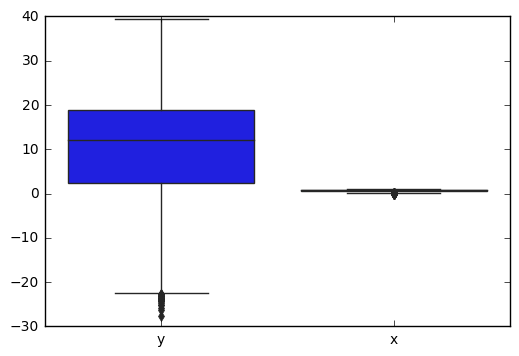

In [35]:
# boxplot to  find outliers of datatset

sb.boxplot(data = dataset)

In [36]:
def feature_scaling(dataset):
    for name in dataset.columns:
        dataset[name] = (dataset[name] - dataset[name].min()) / (dataset[name].max()-dataset[name].min())
    return dataset

In [37]:
# feature  scaling
dataset = feature_scaling(dataset)
dataset.head()

,y,x
0,0.523486,0.89
1,0.521084,0.86
2,0.553144,0.89
3,0.501947,0.83
4,0.517356,0.83


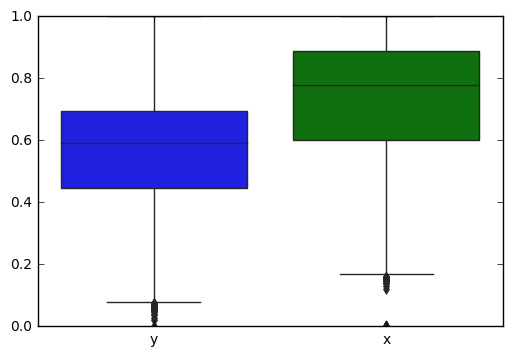

In [38]:
# boxplot to see outliers of datatset
sb.boxplot(data = dataset)

In [39]:

# split dataset into train data and test data

def train_and_test_dataset(dataset):

        train_per = int(0.80*len(dataset))
        test_per = len(dataset)-train_per
        
        train_set = dataset.head(train_per)
        test_set = dataset.tail(test_per)
        
        x_array_train_data = np.array(train_set.x)
        y_array_train_data = np.array(train_set.y)
        
        x_array_test_data = np.array(test_set.x)
        y_array_test_data = np.array(test_set.y)
  
        return train_set,test_set,x_array_train_data,y_array_train_data, x_array_test_data,y_array_test_data




In [40]:
train_data,test_data,x_array_train_data,y_array_train_data, x_array_test_data,y_array_test_data = train_and_test_dataset(dataset)

In [41]:
 class Simple_Linear_regression:
    
    #initialize input variables
    def __init__(self):
        self.learning_rate = 0.03
        self.epoch = 1000
        self.theta_0 = 0.4
        self.theta_1 = 0.7   
  
    # Calculate Gradient Decent 
    # th0 - (learning_rate * 1/ iterations )* sum_of_i_1_to_iterations[(th0+th1*Xi)-Yi]
    # th1 - (learning_rate * 1/ iterations )* sum_of_i_1_to_iterations[[(th0+th1*Xi)-Yi]*Xi]
    def Gradient_Decent(self,x_array_train_data,y_array_train_data):
        size = len(x_array_train_data)
        itration = self.epoch
        fig = plt.figure()
        fig, (ax1, ax2, ax3,ax4) = plt.subplots(nrows=4, ncols=1, figsize=(5, 20))
        for itr in range(itration):
            #total_cost_fun=[0]*len(self.epoch)
            total_cost_fun = 0
            derivative_cost1 = 0.0
            derivative_cost2 = 0.0
            cost_fun = 0.0
            
            
            for row in range(len(x_array_train_data)):
                
                derivative_cost1 += self.theta_0 + self.theta_1*x_array_train_data[row]- y_array_train_data[row]
                derivative_cost2 += (self.theta_0 + self.theta_1*x_array_train_data[row]- y_array_train_data[row])*x_array_train_data[row]
        
                cost_fun += np.square((self.theta_0 + self.theta_1*x_array_train_data[row])-y_array_train_data[row])            
           
            self.theta_0 = self.theta_0-(self.learning_rate*derivative_cost1)/size
            #print("theta_0: ", self.theta_0)
            self.theta_1 = self.theta_1-(self.learning_rate*derivative_cost2)/size
            #print("theta_1: ", self.theta_1)
            
            total_cost_fun= ((1/2)*size)*cost_fun
            #print("Cost ..",total_cost_fun)

            #  ploting graphs  on each 50 epochs 
            if(itr%50 == 0):
                ax1.plot(itr,self.theta_0,color='r')
                ax1.set_title('iteration vs theta 0')
                ax2.plot(itr,self.theta_1,color='g')
                ax2.set_title('iteration vs theta 1')
                ax3.plot(itr,total_cost_fun,marker='*',color='b')
                ax3.set_title('iteration vs cost')
                ax4.plot(self.theta_0,self.theta_1,marker = 'x', color='black')
                ax4.set_title('theta_0 vs theta_1')
            if(total_cost_fun<=0.00009): 
                break

        plt.subplots_adjust(hspace=1)
        plt.show()
                
            
        thetas=[self.theta_0 , self.theta_1]
        
        return thetas
    
    
    # Find y_predict values
    def test_datas(self, x_array_test_data, thitas):
        y_predict = [0]* len(x_array_test_data)
        for i in range(len(x_array_test_data)):
            y_predict[i]=thitas[0]+(thitas[1]*x_array_test_data[i])
        return y_predict
    
        # find the Accuracy
    def Accuracy(self,y_predict,y_array_test_data):
        total_error = 0
        accuracy = 0
        for i in range(0,len(y_array_test_data)):
            total_error += abs((y_predict[i]-y_array_test_data[i])/y_array_test_data[i])
        total_error = (total_error/len(y_array_test_data))
        accuracy = (1-total_error)*100
        print("Accuracy:",accuracy)
        return accuracy
    
#     def plotgraph(self,x_test_data,y_test_data, y_predict):

#         plt.scatter(x_test_data, y_test_data, marker = "x",color='g', label='Test Data Set')
#         plt.plot(x_test_data, y_predict, color='r', label='Predicted Values')
#         plt.legend()
#         plt.show()
        
#     def plotgraph_one(self,x_train_data, y_train_data, y_predict):
#         plt.scatter(x_train_data, y_train_data, marker = "x",color='g', label='Train Data Set')
#         plt.plot(x_train_data, y_predict, color='r', label='Predicted Values')
#         plt.legend()
    
#         plt.show()
    

        

In [42]:
# Initialize values
obj = Simple_Linear_regression()

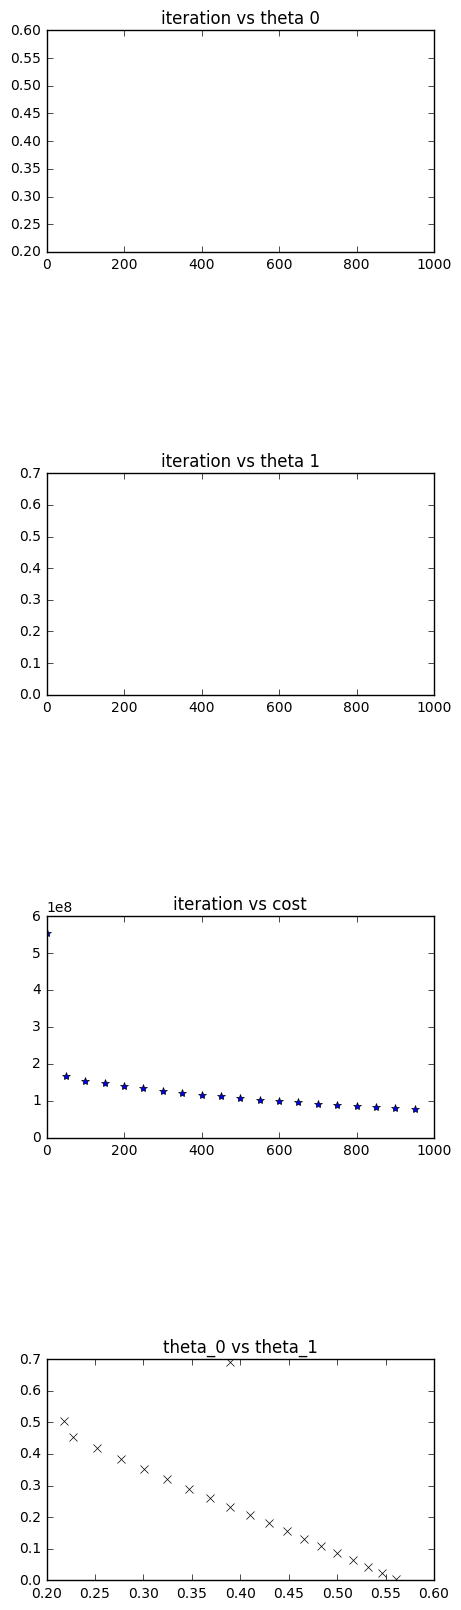

In [43]:
# Call Gradient_Decent Algorithm
Thitas = obj.Gradient_Decent(x_array_train_data,y_array_train_data)


In [44]:
Thitas

[0.57437778546920626, -0.013628928451021281]

In [45]:
# call for Y_predict values
y_predict = obj.test_datas(x_array_test_data, Thitas)
print(len(y_predict))

19291


In [46]:
# calculate Accuracy
accuracy_print =obj.Accuracy(y_array_test_data,y_predict)

Accuracy: 77.426712546


In [ ]:
#obj.plotgraph(x_array_test_data,y_array_test_data, y_predict)

In [ ]:
#obj.plotgraph_one(x_array_train_data, y_array_train_data, y_predict)

In [ ]:
#obj.test_datas(x_array_train_data, thitas)